In [1]:
from platform import python_version
print(f'A versão da linguagem Python usada neste projeto é a {python_version()}!')

A versão da linguagem Python usada neste projeto é a 3.10.12!


In [2]:
print('Bye bye, World!')

Bye bye, World!


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

print('Bibliotecas carregadas com sucesso!')


Bibliotecas carregadas com sucesso!


In [6]:
df_dataset = pd.read_csv ( '/content/iris.csv', sep=',', index_col=None)

print('Dados importados com sucesso!')

Dados importados com sucesso!


In [7]:
display(df_dataset)


,id_planta,comprimento_sepala,largura_sepala,comprimento_petala,largura_petala,cidade_origem,classe
0,0,5.1,3.5,1.4,0.2,São Paulo,Iris-setosa
1,1,4.9,3.0,1.4,0.2,Sorocaba,Iris-setosa
2,2,4.7,3.2,1.3,0.2,São Paulo,Iris-setosa
3,3,4.6,3.1,1.5,0.2,Sorocaba,Iris-setosa
4,4,5.0,3.6,1.4,0.2,São Paulo,Iris-setosa
...,...,...,...,...,...,...,...
147,145,6.7,3.0,5.2,2.3,São Paulo,Iris-virginica
148,146,6.3,2.5,5.0,1.9,Campinas,Iris-virginica
149,147,6.5,3.0,5.2,2.0,Sorocaba,Iris-virginica
150,148,6.2,3.4,5.4,2.3,Sorocaba,Iris-virginica


In [8]:
df_dataset = df_dataset.drop(columns=['id_planta','cidade_origem'])

display(df_dataset.head(n=10))

,comprimento_sepala,largura_sepala,comprimento_petala,largura_petala,classe
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [9]:
idxRowNan = pd.isnull(df_dataset).any(1).to_numpy().nonzero()

display(df_dataset.iloc[idxRowNan])

<ipython-input-9-b332ced64c3f>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  idxRowNan = pd.isnull(df_dataset).any(1).to_numpy().nonzero()


,comprimento_sepala,largura_sepala,comprimento_petala,largura_petala,classe
23,5.1,NaN,1.7,0.5,Iris-setosa
24,4.8,NaN,1.9,0.2,Iris-setosa
30,4.8,3.1,NaN,0.2,Iris-setosa


In [28]:
def trataFaltantes( df_dataset ):

    notNull_ls = df_dataset.loc[ ~pd.isnull(df_dataset['largura_sepala']), :]
    notNull_cp = df_dataset.loc[ ~pd.isnull(df_dataset['comprimento_petala']), :]

    media_ls = notNull_ls[ notNull_ls['classe']=='Iris-virginica' ]['largura_sepala'].mean()
    media_cp = notNull_cp[ notNull_cp['classe']=='Iris-virginica' ]['comprimento_petala'].mean()

    df_dataset.loc[ pd.isnull(df_dataset['largura_sepala']), 'largura_sepala'] = media_ls
    df_dataset.loc[ pd.isnull(df_dataset['comprimento_petala']), 'comprimento_petala'] = media_cp

    return df_dataset

trataFaltantes( df_dataset )

print('\nObjeto(s) com valor(es) nulo(s):')
display(df_dataset.iloc[idxRowNan])


Objeto(s) com valor(es) nulo(s):


,comprimento_sepala,largura_sepala,comprimento_petala,largura_petala,classe
23,5.1,3.416667,1.700000,0.5,Iris-setosa
24,4.8,3.416667,1.900000,0.2,Iris-setosa
30,4.8,3.100000,1.461224,0.2,Iris-setosa


In [29]:
df_duplicates = df_dataset[ df_dataset.duplicated(subset=['comprimento_sepala','largura_sepala','comprimento_petala','largura_petala'],keep=False)]

if len(df_duplicates) > 0:
    print('\nObjeto(s) redundante(s) e/ou inconsistente(s):')
    display(df_duplicates)
else:
    print('Não existem objetos redundantes e/ou inconsistentes!')

Não existem objetos redundantes e/ou inconsistentes!


In [30]:
def delDuplicatas( df_dataset ):

    df_dataset = df_dataset.drop_duplicates(keep = 'first')

    return df_dataset

df_dataset = delDuplicatas( df_dataset )

In [31]:
df_duplicates = df_dataset[ df_dataset.duplicated(subset=['comprimento_sepala','largura_sepala','comprimento_petala','largura_petala'],keep=False)]

if len(df_duplicates)>0:
    print('\nObjeto(s) inconsistente(s):')
    display(df_duplicates)
else:
    print('Não existem objetos redundantes e/ou inconsistentes!')


Não existem objetos redundantes e/ou inconsistentes!


In [32]:
def delInconsistencias( df_dataset ):

    df_dataset = df_dataset.drop_duplicates(subset=['comprimento_sepala','largura_sepala','comprimento_petala','largura_petala'], keep = False)

    return df_dataset

df_dataset = delInconsistencias( df_dataset )

df_duplicates = df_dataset[ df_dataset.duplicated(subset=['comprimento_sepala','largura_sepala','comprimento_petala','largura_petala'],keep=False)]

if len(df_duplicates) > 0:
    display(df_duplicates)
else:
    print('Não existem registros redundantes e/ou inconsistentes! :)')

Não existem registros redundantes e/ou inconsistentes! :)


In [33]:
df_detalhes = df_dataset.describe()

display(df_detalhes)

,comprimento_sepala,largura_sepala,comprimento_petala,largura_petala
count,144.000000,144.000000,144.000000,144.000000
mean,5.849306,3.053009,3.771953,1.201389
std,0.827076,0.437752,1.755723,0.750849
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.400000,5.100000,1.800000
max,7.900000,4.200000,6.900000,2.500000


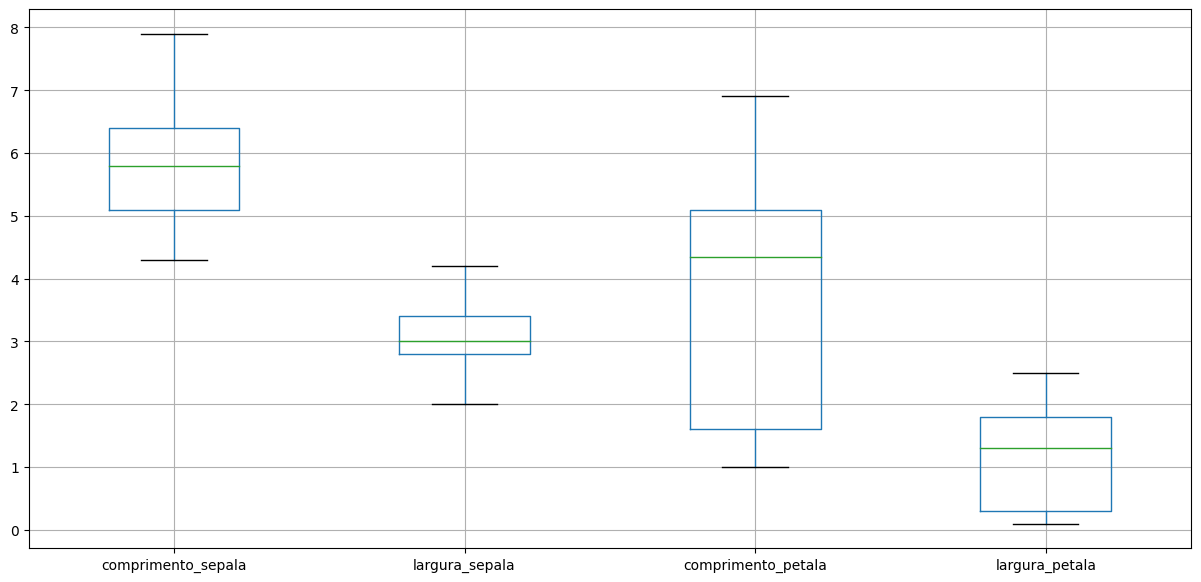

In [34]:
df_dataset.boxplot(figsize=(15,7))
plt.show()

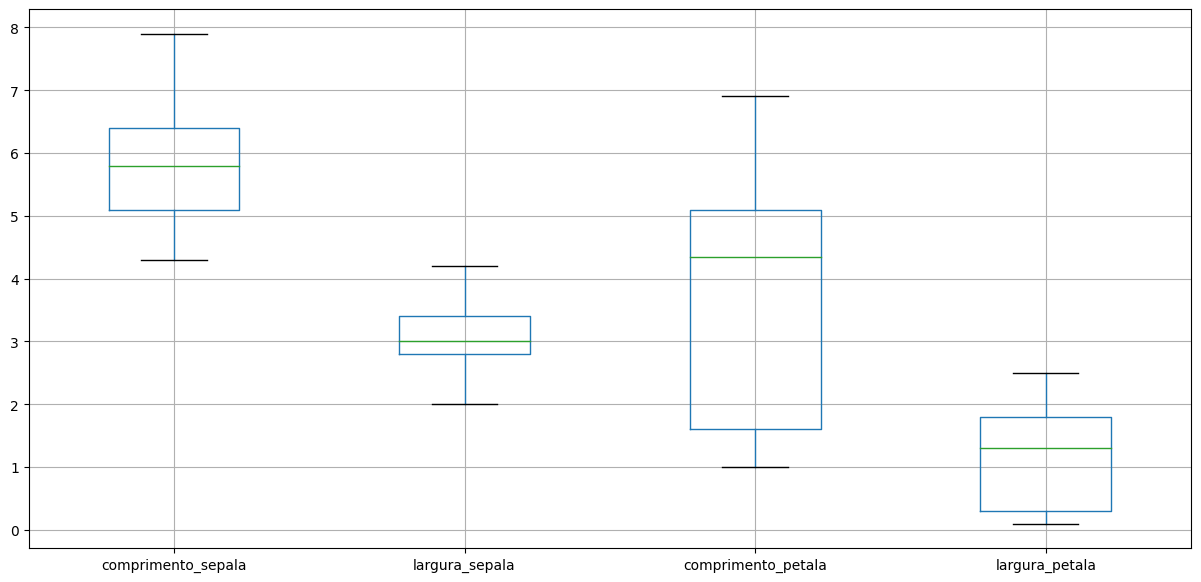

In [35]:
def removeOutliers(df_dataset):
    """
    Remove os outliers da base de dados
    """

    for atributo in df_dataset.columns[:-1]:

        q75, q25 = np.percentile(df_dataset[atributo].values, [75 ,25])

        IQR = q75 - q25

        df_dataset = df_dataset[ (df_dataset[atributo]<=(q75+1.5*IQR)) & (df_dataset[atributo]>=(q25-1.5*IQR)) ]

    return df_dataset

df_dataset = removeOutliers( df_dataset )

df_dataset.boxplot(figsize=(15,7))
plt.show()